In [1]:
from nnlearn.Compress import *
from nnlearn.Network import sigmoid
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image


 shape: (109, 109) 
pixels: 11881


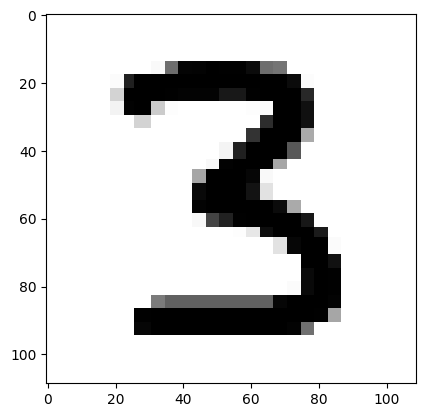

In [2]:
img = image.imread("nnlearn/digit_3.png")[:,:,0]

scale_down_factor = 4

temp_x = np.arange(452) % scale_down_factor == 0
temp_y = np.arange(451) % scale_down_factor == 0
img = img[temp_x, :]
img = img[:,temp_y]

img = img[2:-2,2:-2]

img = sigmoid((img - np.mean(img))/np.std(img)*3)
# print(img)

print("\n shape:", img.shape, "\npixels:", np.product(img.shape))
plt.imshow(img, cmap = 'Greys')
plt.show()

In [3]:
compresser_small = nn_image_compresser(hidden_layers = 2, layer_width = 3)


compresser_large = nn_image_compresser(hidden_layers = 3, layer_width = 9)



In [4]:
eps = 1_000_000

compresser_large.fit(img, batch_size = 10, epochs = eps, verbose = True, learn_coef = .005)

compresser_small.fit(img, batch_size = 10, epochs = eps, verbose = True, learn_coef = .005)



--------------------
epoch: 1 
 loss: 0.85
--------------------
epoch: 200001 
 loss: 0.0898
--------------------
epoch: 400001 
 loss: 0.087
--------------------
epoch: 600001 
 loss: 0.0711
--------------------
epoch: 800001 
 loss: 0.0706
--------------------
epoch: 1000000 
 loss: 0.071
--------------------
epoch: 1 
 loss: 0.1136
--------------------
epoch: 200001 
 loss: 0.0897
--------------------
epoch: 400001 
 loss: 0.0891
--------------------
epoch: 600001 
 loss: 0.089
--------------------
epoch: 800001 
 loss: 0.0872
--------------------
epoch: 1000000 
 loss: 0.0786


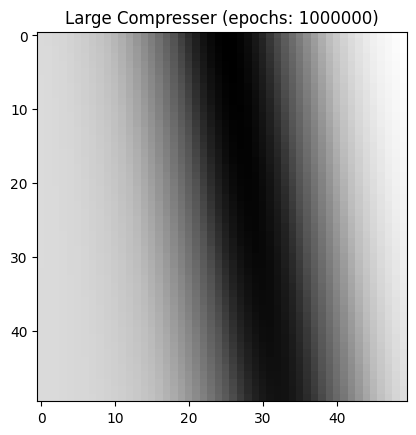

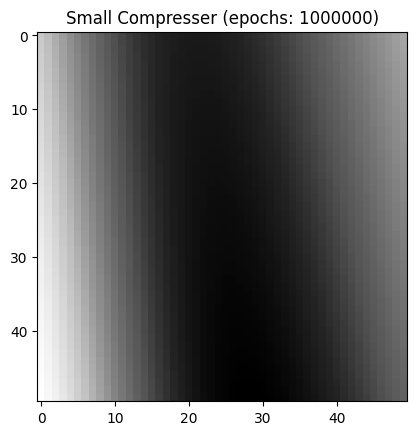

In [5]:
recreated_image = compresser_large.create_image(50,50)

plt.imshow(recreated_image, cmap = 'Greys')
plt.title(f"Large Compresser (epochs: {compresser_large.network.epochs_trained})")


plt.show()

recreated_image = compresser_small.create_image(50,50)

plt.imshow(recreated_image, cmap = 'Greys')
plt.title(f"Small Compresser (epochs: {compresser_large.network.epochs_trained})")


plt.show()

